blei
195.00000098259966
T1:22.699999999999996
Tn:22.800000000000004
glas
194.99999993616177
T1:23.099999999999998
Tn:23.199999999999996
kupfer
193.24212155639933
T1:22.400000000000002
Tn:22.912709271243287


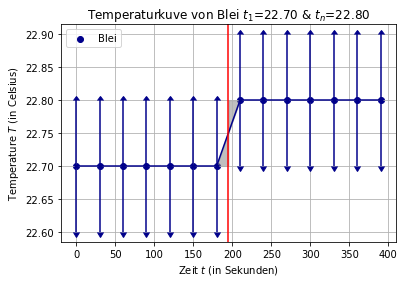

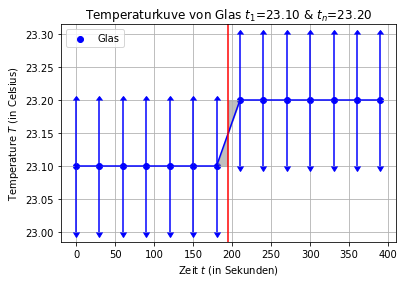

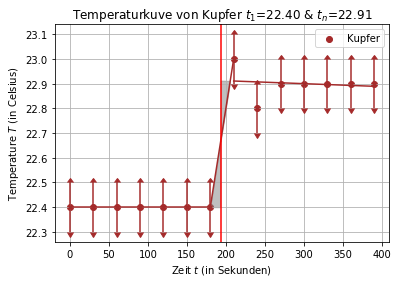

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats

def line(x,m,b):
    return m*x+b

#vor:[:7] nach:[7:]
err=np.full(14,0.1)

pb=np.array([22.7,22.7,22.7,22.7,22.7,22.7,22.7,22.8,22.8,22.8,22.8,22.8,22.8,22.8])
gl=np.array([23.1,23.1,23.1,23.1,23.1,23.1,23.1,23.2,23.2,23.2,23.2,23.2,23.2,23.2])
cu=np.array([22.4,22.4,22.4,22.4,22.4,22.4,22.4,23.0,22.8,22.9,22.9,22.9,22.9,22.9])
x=np.arange(start=0,stop=13*30+1,step=30)
reg_pb_v= stats.linregress(x[:7], pb[:7])
reg_gl_v= stats.linregress(x[:7], gl[:7])
reg_cu_v= stats.linregress(x[:7], cu[:7])
reg_pb_n= stats.linregress(x[7:], pb[7:])
reg_gl_n= stats.linregress(x[7:], gl[7:])
reg_cu_n= stats.linregress(x[7:], cu[7:])
reg_pb_b= stats.linregress(x[6:8], pb[6:8])
reg_gl_b= stats.linregress(x[6:8], gl[6:8])
reg_cu_b= stats.linregress(x[6:8], cu[6:8])

def areapb(t):
    x1=abs((reg_pb_v[1]-reg_pb_b[1]) / (reg_pb_v[0]-reg_pb_b[0]))
    x2=t
    x3=t
    y1=line(x1,reg_pb_v[0],reg_pb_v[1])
    y2=line(t,reg_pb_v[0],reg_pb_v[1])
    y3=line(t,reg_pb_b[0],reg_pb_b[1])
    c=np.cross(np.array([x1,x2,x3]),np.array([y1,y2,y3]))
    area1 = abs(np.sum(c))/2
    x1=abs((reg_pb_n[1]-reg_pb_b[1]) / (reg_pb_n[0]-reg_pb_b[0]))
    x2=t
    x3=t
    y1=line(x1,reg_pb_n[0],reg_pb_n[1])
    y2=line(t,reg_pb_n[0],reg_pb_n[1])
    y3=line(t,reg_pb_b[0],reg_pb_b[1])
    c=np.cross(np.array([x1,x2,x3]),np.array([y1,y2,y3]))
    area2 = abs(np.sum(c))/2
    return abs(area1-area2)
res_pb = optimize.minimize_scalar(areapb).x
print("blei")
print(res_pb)
print(f"T1:{line(res_pb,reg_pb_v[0],reg_pb_v[1])}")
print(f"Tn:{line(res_pb,reg_pb_n[0],reg_pb_n[1])}")

def areagl(t):
    x1=abs((reg_gl_v[1]-reg_gl_b[1]) / (reg_gl_v[0]-reg_gl_b[0]))
    x2=t
    x3=t
    y1=line(x1,reg_gl_v[0],reg_gl_v[1])
    y2=line(t,reg_gl_v[0],reg_gl_v[1])
    y3=line(t,reg_gl_b[0],reg_gl_b[1])
    c=np.cross(np.array([x1,x2,x3]),np.array([y1,y2,y3]))
    area1 = abs(np.sum(c))/2
    x1=abs((reg_gl_n[1]-reg_gl_b[1]) / (reg_gl_n[0]-reg_gl_b[0]))
    x2=t
    x3=t
    y1=line(x1,reg_gl_n[0],reg_gl_n[1])
    y2=line(t,reg_gl_n[0],reg_gl_n[1])
    y3=line(t,reg_gl_b[0],reg_gl_b[1])
    c=np.cross(np.array([x1,x2,x3]),np.array([y1,y2,y3]))
    area2 = abs(np.sum(c))/2
    return abs(area1-area2)
res_gl = optimize.minimize_scalar(areagl).x
print("glas")
print(res_gl)
print(f"T1:{line(res_gl,reg_gl_v[0],reg_gl_v[1])}")
print(f"Tn:{line(res_gl,reg_gl_n[0],reg_gl_n[1])}")

def areacu(t):
    x1=(reg_cu_v[1]-reg_cu_b[1]) / (reg_cu_v[0]-reg_cu_b[0])
    x2=t
    x3=t
    y1=line(x1,reg_cu_v[0],reg_cu_v[1])
    y2=line(t,reg_cu_v[0],reg_cu_v[1])
    y3=line(t,reg_cu_b[0],reg_cu_b[1])
    c=np.cross(np.array([x1,x2,x3]),np.array([y1,y2,y3]))
    area1 = abs(np.sum(c))/2
    x1=(reg_cu_n[1]-reg_cu_b[1]) / (reg_cu_n[0]-reg_cu_b[0])
    x2=t
    x3=t
    y1=line(x1,reg_cu_n[0],reg_cu_n[1])
    y2=line(t,reg_cu_n[0],reg_cu_n[1])
    y3=line(t,reg_cu_b[0],reg_cu_b[1])
    c=np.cross(np.array([x1,x2,x3]),np.array([y1,y2,y3]))
    area2 = abs(np.sum(c))/2
    return abs(area1-area2)
res_cu = optimize.minimize_scalar(areacu).x
print("kupfer")
print(res_cu)
print(f"T1:{line(res_cu,reg_cu_v[0],reg_cu_v[1])}")
print(f"Tn:{line(res_cu,reg_cu_n[0],reg_cu_n[1])}")



plt.scatter(x,pb,color="darkblue",label="Blei")
plt.plot(x[0:7],line(x[0:7],reg_pb_v[0],reg_pb_v[1]),color="darkblue")
plt.plot(x[7:],line(x[7:],reg_pb_n[0],reg_pb_n[1]),color="darkblue")
plt.plot(x[6:8],line(x[6:8],reg_pb_b[0],reg_pb_b[1]),color="darkblue")
plt.errorbar(x,pb,yerr=err,fmt=".",color="darkblue",uplims=True, lolims=True)
plt.legend()
plt.grid()
plt.axvline(x=res_pb,color="red")
plt.title("Temperaturkuve von Blei $t_1$={:.2f} & $t_n$={:.2f}".format(line(res_pb,reg_pb_v[0],reg_pb_v[1]),line(res_pb,reg_pb_n[0],reg_pb_n[1])))
plt.ylabel(r'Temperature $T$ (in Celsius)')
plt.xlabel(r'Zeit $t$ (in Sekunden)')


low= abs((reg_pb_v[1]-reg_pb_b[1]) / (reg_pb_v[0]-reg_pb_b[0]))
high= abs((reg_pb_n[1]-reg_pb_b[1]) / (reg_pb_n[0]-reg_pb_b[0]))

xb = np.arange(low,res_pb,1)
y1 =xb*reg_pb_v[0]+reg_pb_v[1]
y2 =xb*reg_pb_b[0]+reg_pb_b[1]
y3 =xb*reg_pb_n[0]+reg_pb_n[1]

plt.fill_between(x=xb,y1=y1,y2=y2,color='grey',alpha='0.5')

xb = np.arange(res_pb,high,1)
y1 =xb*reg_pb_v[0]+reg_pb_v[1]
y2 =xb*reg_pb_b[0]+reg_pb_b[1]
y3 =xb*reg_pb_n[0]+reg_pb_n[1]

plt.fill_between(x=xb,y1=y2,y2=y3,color='grey',alpha='0.5')


plt.savefig("blei.png")
plt.show()



plt.scatter(x,gl,color="blue",label="Glas")
plt.plot(x[0:7],line(x[0:7],reg_gl_v[0],reg_gl_v[1]),color="blue")
plt.plot(x[7:],line(x[7:],reg_gl_n[0],reg_gl_n[1]),color="blue")
plt.plot(x[6:8],line(x[6:8],reg_gl_b[0],reg_gl_b[1]),color="blue")
plt.errorbar(x,gl,yerr=err,fmt=".",color="blue",uplims=True, lolims=True)
plt.legend()
plt.grid()
plt.axvline(x=res_gl,color="red")
plt.title("Temperaturkuve von Glas $t_1$={:.2f} & $t_n$={:.2f}".format(line(res_gl,reg_gl_v[0],reg_gl_v[1]),line(res_gl,reg_gl_n[0],reg_gl_n[1])))
plt.ylabel(r'Temperature $T$ (in Celsius)')
plt.xlabel(r'Zeit $t$ (in Sekunden)')


low= abs((reg_gl_v[1]-reg_gl_b[1]) / (reg_gl_v[0]-reg_gl_b[0]))
high= abs((reg_gl_n[1]-reg_gl_b[1]) / (reg_gl_n[0]-reg_gl_b[0]))

xb = np.arange(low,res_gl,1)
y1 =xb*reg_gl_v[0]+reg_gl_v[1]
y2 =xb*reg_gl_b[0]+reg_gl_b[1]
y3 =xb*reg_gl_n[0]+reg_gl_n[1]

plt.fill_between(x=xb,y1=y1,y2=y2,color='grey',alpha='0.5')

xb = np.arange(res_gl,high,1)
y1 =xb*reg_gl_v[0]+reg_gl_v[1]
y2 =xb*reg_gl_b[0]+reg_gl_b[1]
y3 =xb*reg_gl_n[0]+reg_gl_n[1]

plt.fill_between(x=xb,y1=y2,y2=y3,color='grey',alpha='0.5')


plt.savefig("glas.png")
plt.show()




plt.scatter(x,cu,color="brown",label="Kupfer")
plt.plot(x[0:7],line(x[0:7],reg_cu_v[0],reg_cu_v[1]),color="brown")
plt.plot(x[7:],line(x[7:],reg_cu_n[0],reg_cu_n[1]),color="brown")
plt.plot(x[6:8],line(x[6:8],reg_cu_b[0],reg_cu_b[1]),color="brown")
plt.errorbar(x,cu,yerr=err,fmt=".",color="brown",uplims=True, lolims=True)
plt.legend()
plt.grid()
plt.axvline(x=res_cu,color="red")
plt.title("Temperaturkuve von Kupfer $t_1$={:.2f} & $t_n$={:.2f}".format(line(res_cu,reg_cu_v[0],reg_cu_v[1]),line(res_cu,reg_cu_n[0],reg_cu_n[1])))
plt.ylabel(r'Temperature $T$ (in Celsius)')
plt.xlabel(r'Zeit $t$ (in Sekunden)')

low= abs((reg_cu_v[1]-reg_cu_b[1]) / (reg_cu_v[0]-reg_cu_b[0]))
high= abs((reg_cu_n[1]-reg_cu_b[1]) / (reg_cu_n[0]-reg_cu_b[0]))

xb = np.arange(low,res_cu,1)
y1 =xb*reg_cu_v[0]+reg_cu_v[1]
y2 =xb*reg_cu_b[0]+reg_cu_b[1]
y3 =xb*reg_cu_n[0]+reg_cu_n[1]

plt.fill_between(x=xb,y1=y1,y2=y2,color='grey',alpha='0.5')

xb = np.arange(res_cu,high,1)
y1 =xb*reg_cu_v[0]+reg_cu_v[1]
y2 =xb*reg_cu_b[0]+reg_cu_b[1]
y3 =xb*reg_cu_n[0]+reg_cu_n[1]

plt.fill_between(x=xb,y1=y2,y2=y3,color='grey',alpha='0.5')



plt.savefig("kupfer.png")
plt.show()
